In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('CPALL_Month.xlsx')

In [4]:
data

,Date,Prior,Open,High,Low,Close,P/E,PEG,P/BV,Market Cap. (M.Baht)
0,01/2016,39.25,39.25,43.25,39.00,40.75,29.71,-,10.88,366061.379931
1,02/2016,40.75,40.50,45.00,39.50,43.25,31.53,-,11.54,388519.133301
2,03/2016,43.25,44.50,48.75,43.50,45.75,30.04,-,11.00,410976.886671
3,04/2016,45.75,45.75,46.75,43.75,45.75,30.04,-,11.00,410976.886671
4,05/2016,45.75,45.50,49.75,45.25,49.75,31.17,-,10.83,446909.292063
...,...,...,...,...,...,...,...,...,...,...
66,07/2021,60.00,59.75,61.00,58.50,59.00,40.59,-0.98,5.32,530002.979532
67,08/2021,59.00,59.00,65.00,56.50,65.00,47.24,-1.21,6.22,583901.587620
68,09/2021,65.00,67.00,67.75,61.00,63.50,46.15,-1.18,6.08,570426.935598
69,10/2021,63.50,63.00,65.75,62.25,64.00,46.52,-1.19,6.13,574918.486272


In [5]:
data = data.replace('-',0,regex=True)

In [6]:
data

,Date,Prior,Open,High,Low,Close,P/E,PEG,P/BV,Market Cap. (M.Baht)
0,01/2016,39.25,39.25,43.25,39.00,40.75,29.71,0.00,10.88,366061.379931
1,02/2016,40.75,40.50,45.00,39.50,43.25,31.53,0.00,11.54,388519.133301
2,03/2016,43.25,44.50,48.75,43.50,45.75,30.04,0.00,11.00,410976.886671
3,04/2016,45.75,45.75,46.75,43.75,45.75,30.04,0.00,11.00,410976.886671
4,05/2016,45.75,45.50,49.75,45.25,49.75,31.17,0.00,10.83,446909.292063
...,...,...,...,...,...,...,...,...,...,...
66,07/2021,60.00,59.75,61.00,58.50,59.00,40.59,-0.98,5.32,530002.979532
67,08/2021,59.00,59.00,65.00,56.50,65.00,47.24,-1.21,6.22,583901.587620
68,09/2021,65.00,67.00,67.75,61.00,63.50,46.15,-1.18,6.08,570426.935598
69,10/2021,63.50,63.00,65.75,62.25,64.00,46.52,-1.19,6.13,574918.486272


In [7]:
data2 = data.copy()

In [8]:
data['PE_Label'] = data['P/E'].apply(lambda x: 1 if x < 30 else(2 if 30 <= x < 35 else(3 if 35 <= x < 40 else 4 )))

In [9]:
data['PEG_Label'] = data['PEG'].apply(lambda x: 0 if x < 0  else(1 if 0 <= x < 3 else(2 if 3 <= x < 6 else(4 if 6 <= x < 9 else 4))))

In [10]:
data['PBV_Label'] = data['P/BV'].apply(lambda x: 1 if x < 5 else(2 if 5 <= x < 7 else(3 if 7 <= x < 9 else 4 )))

In [11]:
data['Return'] = data['Close'].pct_change()

In [12]:
df = data[['PE_Label','PBV_Label','PEG_Label','Return']]

In [13]:
df['Return_Shift'] = df['Return'].shift(-1)

C:\Users\Yanak\AppData\Local\Temp/ipykernel_14972/175632929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return_Shift'] = df['Return'].shift(-1)


In [14]:
df.dropna(inplace=True)

C:\Users\Yanak\AppData\Local\Temp/ipykernel_14972/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [15]:
df = df[['PE_Label','PBV_Label','PEG_Label','Return_Shift']]

In [16]:
df

,PE_Label,PBV_Label,PEG_Label,Return_Shift
1,2,4,1,0.057803
2,2,4,1,0.000000
3,2,4,1,0.087432
4,2,4,1,0.010050
5,2,4,1,0.029851
...,...,...,...,...
65,4,2,0,-0.016667
66,4,2,0,0.101695
67,4,2,0,-0.023077
68,4,2,0,0.007874


In [17]:
X = df.iloc[:42, :3]
y = df.iloc[:42, -1]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [20]:
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=10)
scores

array([-1.10898300e-02,  6.54958185e-02, -4.30580873e+00, -2.90950223e+00,
       -1.38635966e+01, -3.25612054e+00, -2.47437858e+00, -4.68236629e+00,
       -5.07084911e-01, -4.67952213e-01])

In [21]:
df.corr()

,PE_Label,PBV_Label,PEG_Label,Return_Shift
PE_Label,1.000000,0.190328,-0.224037,-0.008698
PBV_Label,0.190328,1.000000,0.026492,0.121196
PEG_Label,-0.224037,0.026492,1.000000,-0.168653
Return_Shift,-0.008698,0.121196,-0.168653,1.000000


In [22]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [23]:
y_pred = reg.predict(X_test)

In [24]:
reg.score(X_test, y_test)

-0.7000694777502476

In [25]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.045580748622943916
MSE =  0.003177799309630844
RMSE =  0.056371972731410105


In [26]:
reg.coef_

array([-0.04404885,  0.02507209,  0.00487577])

In [27]:
live_data = reg.predict(df.iloc[42:, :3])

In [28]:
live_data

array([ 0.0046142 ,  0.02359096,  0.02359096,  0.02359096,  0.06763981,
        0.06763981,  0.03281619,  0.03281619,  0.03281619,  0.04256772,
        0.04256772,  0.04256772,  0.02306466,  0.02306466,  0.02306466,
        0.02306466,  0.02306466,  0.02306466, -0.02098419, -0.06503304,
       -0.02098419, -0.10908189, -0.10908189, -0.10908189, -0.10908189,
       -0.10908189, -0.10908189])

In [29]:
test = df.iloc[42:]

In [30]:
test['Pred'] = live_data

C:\Users\Yanak\AppData\Local\Temp/ipykernel_14972/2832366921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = live_data


In [31]:
test

,PE_Label,PBV_Label,PEG_Label,Return_Shift,Pred
43,3,4,4,-0.032738,0.004614
44,2,3,4,-0.040000,0.023591
45,2,3,4,-0.025641,0.023591
46,2,3,4,-0.049342,0.023591
47,1,3,4,-0.020761,0.067640
48,1,3,4,-0.070671,0.067640
49,1,2,2,-0.072243,0.032816
50,1,2,2,0.163934,0.032816
51,1,2,2,-0.007042,0.032816
52,1,2,4,-0.039007,0.042568


<AxesSubplot:>

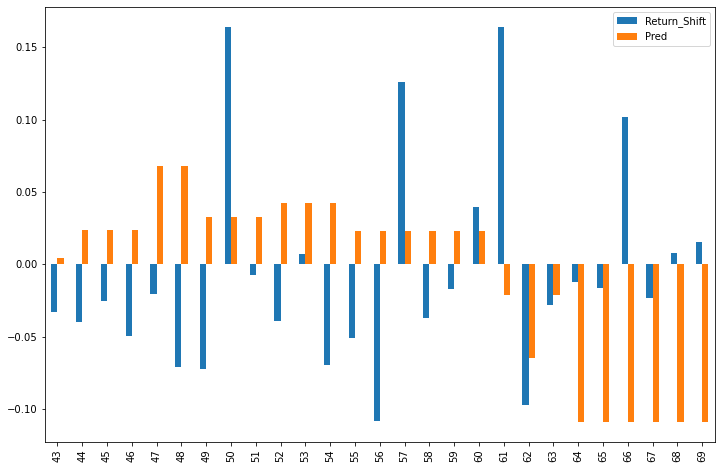

In [32]:
test.iloc[:, -2:].tail(30).plot(kind='bar', figsize=(12,8))